<a href="https://colab.research.google.com/github/Minhyuk03/KMOU-2025-2_ML/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_12%EC%A3%BC%EC%B0%A8_%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C%EC%99%80%EB%A7%A4%EB%8B%88%ED%8F%B4%EB%93%9Cipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LAB 11-2: 주성분을 추출해 이미지를 압축하고 복원하기 (MNIST)
원본 데이터 형태: (1797, 64)
이미지 크기: 8x8 픽셀
특징(Feature) 개수: 64 (픽셀 수)

64 차원의 데이터를 50 차원으로 축소하는 PCA 학습 중...


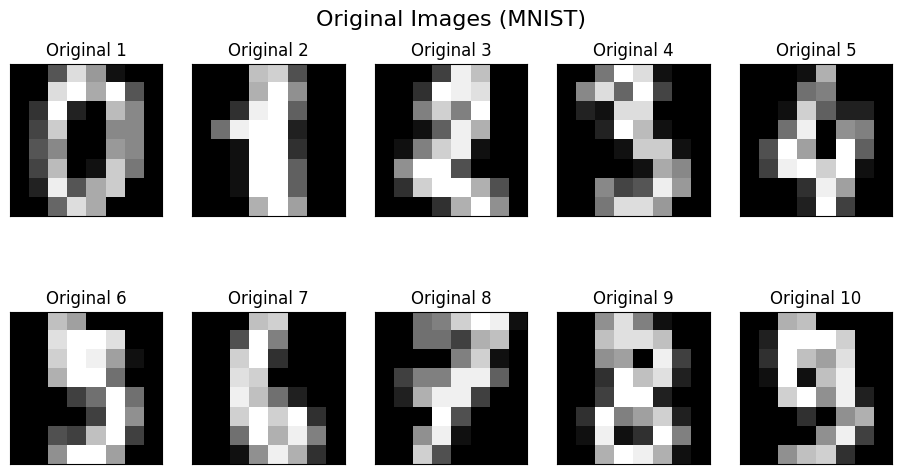

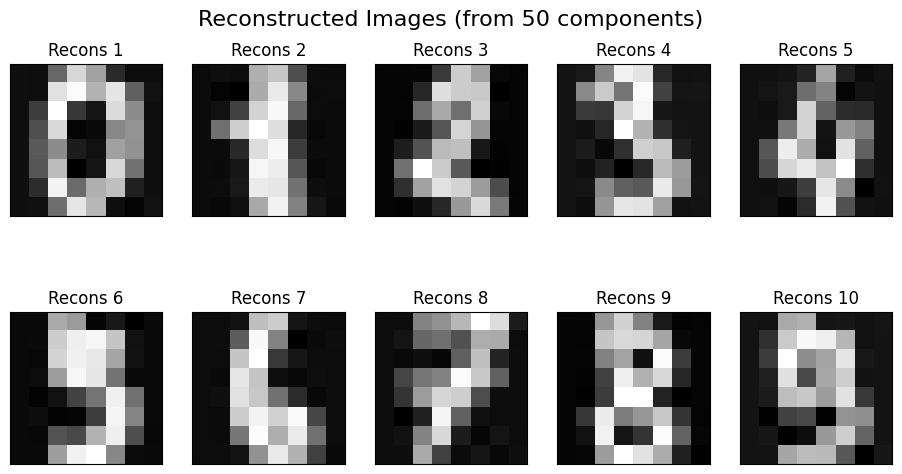

슬라이드 16-17: 주성분 분석을 이용한 얼굴 이미지 데이터 성분 분석
데이터셋 크기: 1288개 샘플
이미지 크기: 50x37 픽셀
특징(Feature) 개수: 1850 (픽셀 수)

1850 차원의 데이터를 150 차원으로 축소하는 PCA 학습 중...


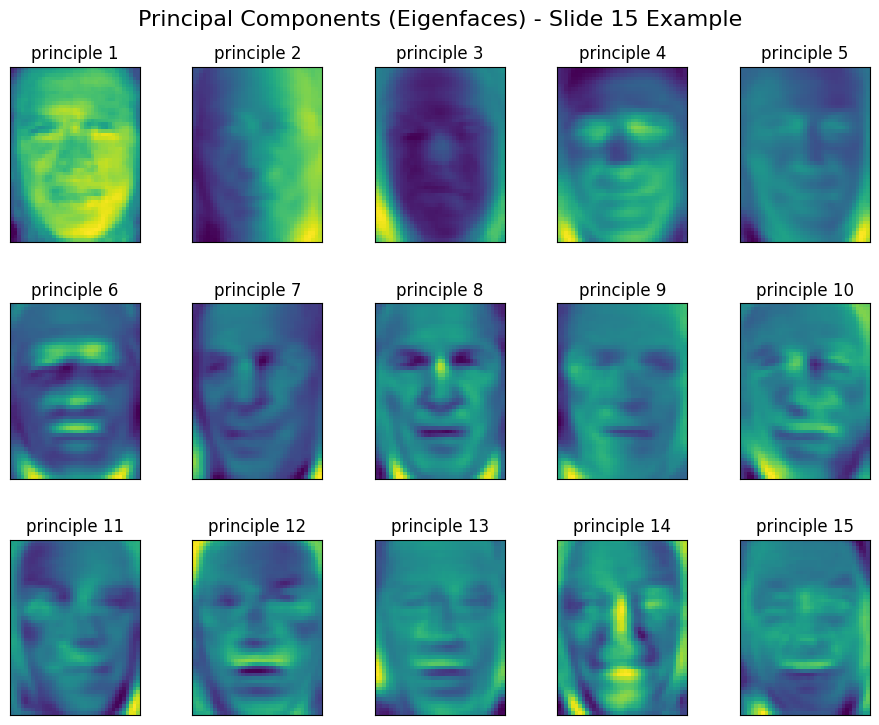

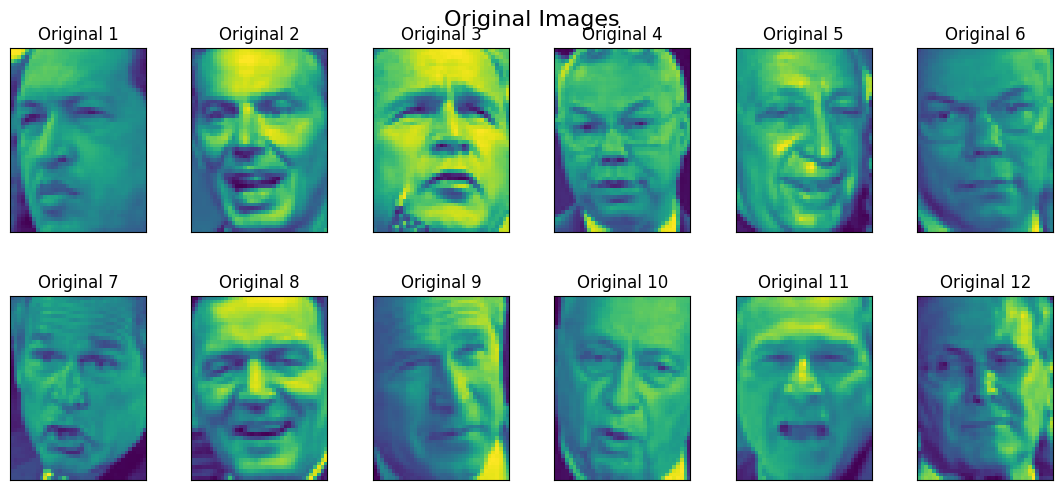

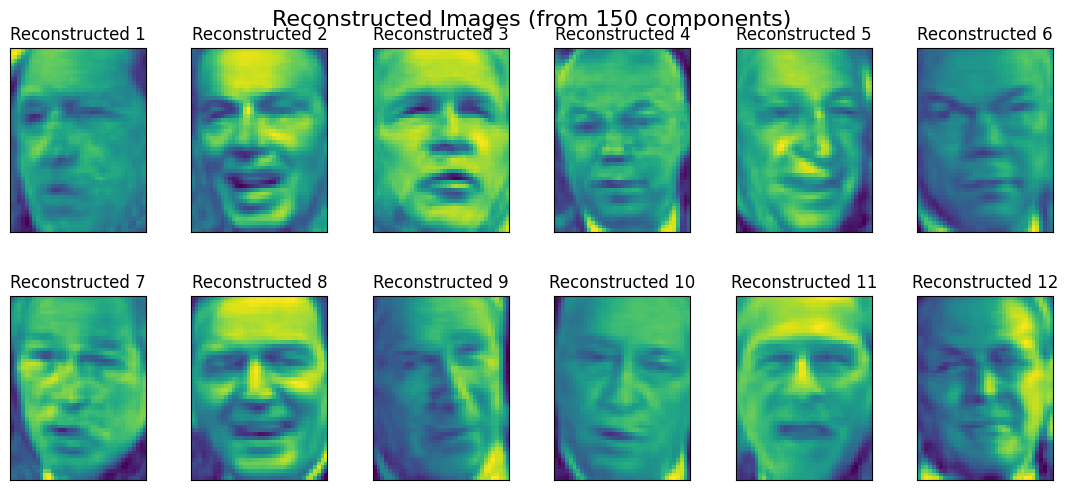

슬라이드 28-29: PCA, t-SNE 이용한 숫자 데이터 시각화


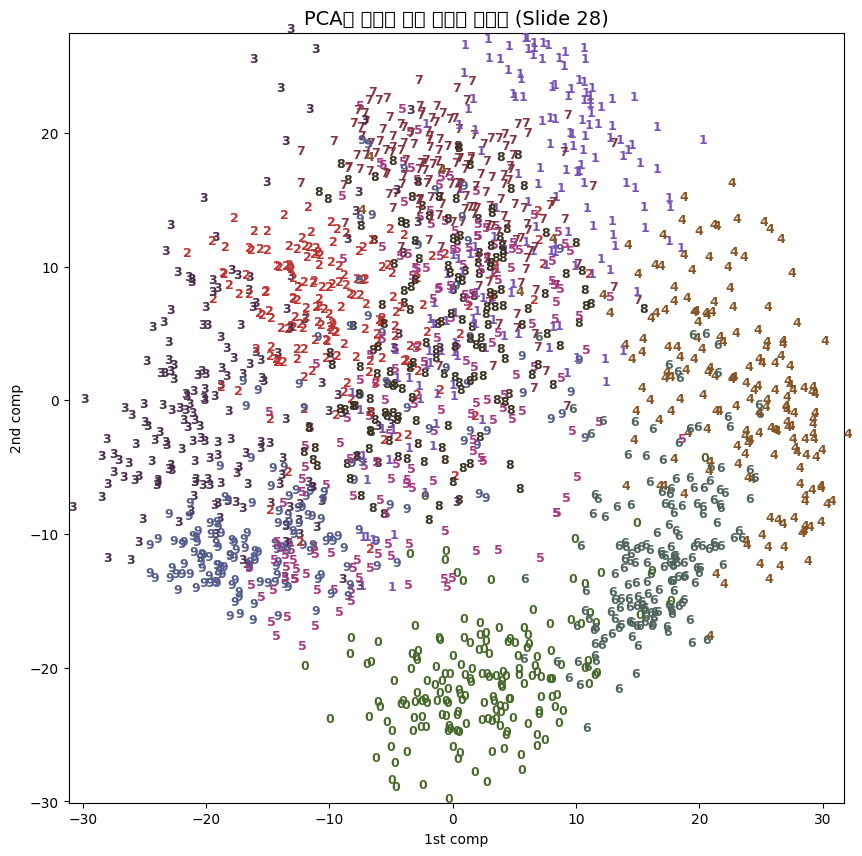

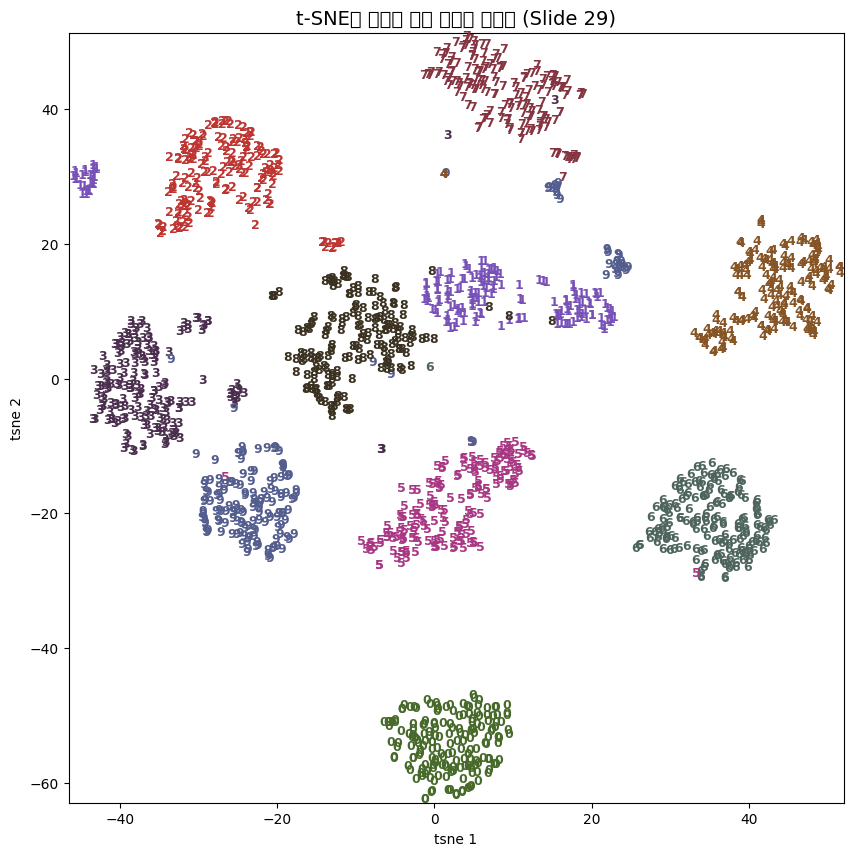

LAB 11-4: 매니폴드 학습을 이용한 차원 축소 실습 (Swiss Roll)


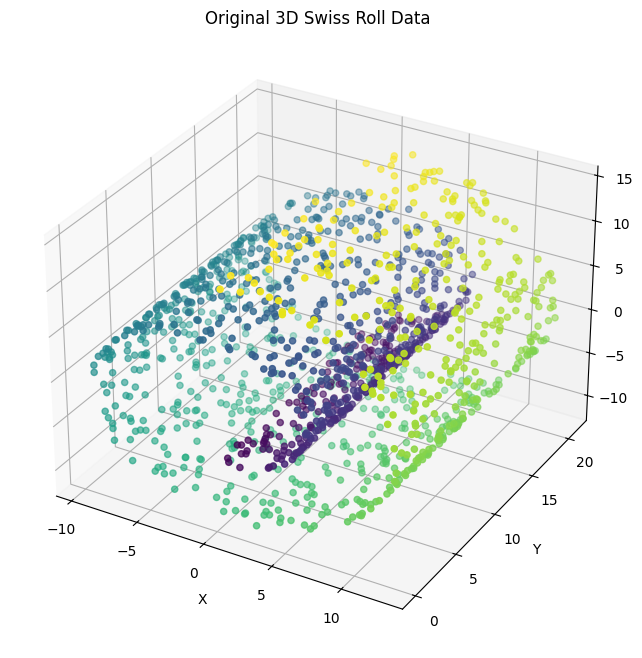

Applying PCA...
Applying Isomap...
Applying LLE...
Applying t-SNE...


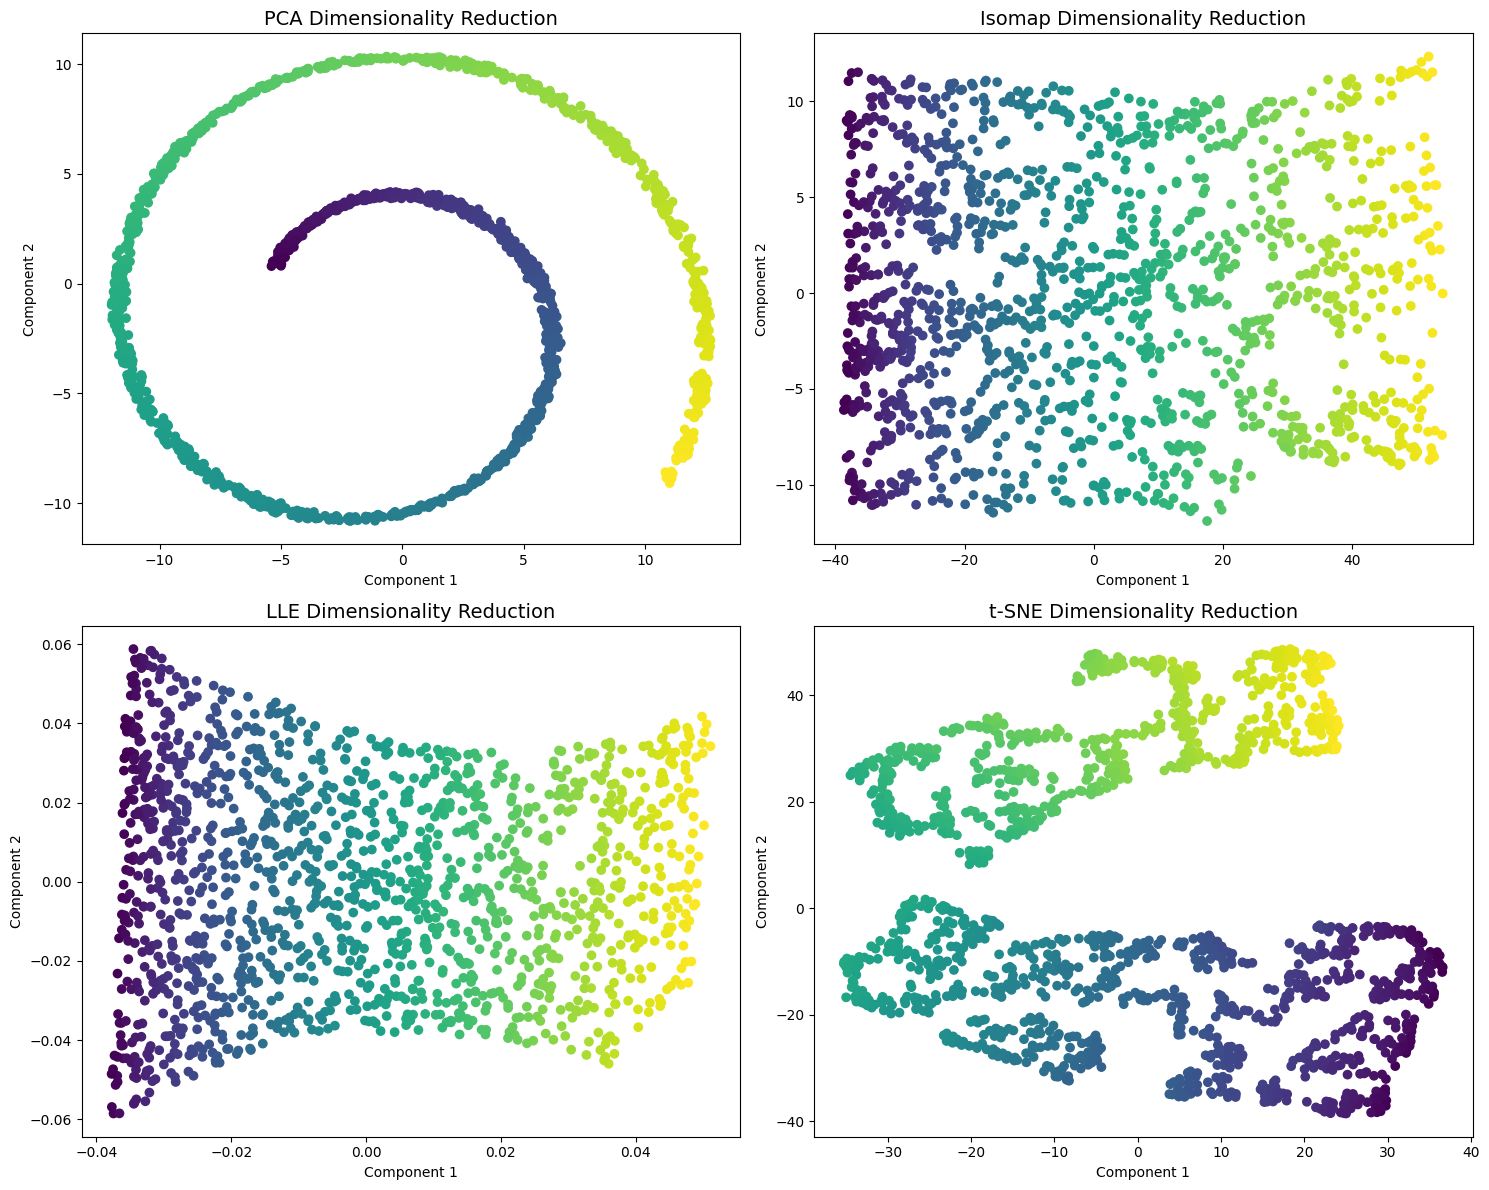

In [1]:
# Chapter 11. 차원 축소와 매니폴드 학습 실습 코드

import matplotlib.pyplot as plt
import numpy as np
import warnings
from mpl_toolkits.mplot3d import Axes3D

# 데이터셋 로드 및 경고 무시 설정
from sklearn.datasets import load_digits, fetch_lfw_people, make_swiss_roll
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding, Isomap

warnings.filterwarnings('ignore')

# 1. LAB 11-2: 주성분 분석을 이용한 얼굴 이미지 성분 분석 및 이미지 압축/복원
def lab_11_2_image_compression():
    print("LAB 11-2: 주성분을 추출해 이미지를 압축하고 복원하기 (MNIST)")

    # MNIST 숫자 이미지 데이터 로드 (28x28 픽셀 -> 784차원)
    digits = load_digits()
    X = digits.data

    # 28x28 이미지로 가정하고 h, w 설정
    h, w = digits.images.shape[1], digits.images.shape[2]
    n_features = X.shape[1]

    print(f"원본 데이터 형태: {X.shape}")
    print(f"이미지 크기: {h}x{w} 픽셀")
    print(f"특징(Feature) 개수: {n_features} (픽셀 수)")

    # 1. 스케일 조정 (PCA 전처리)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 2. PCA 모델 생성 및 학습
    # 784차원(28x28)을 100차원으로 축소하는 예제
    n_components = 50
    print(f"\n{n_features} 차원의 데이터를 {n_components} 차원으로 축소하는 PCA 학습 중...")
    pca = PCA(n_components=n_components)
    pca.fit(X_scaled)

    # 3. 차원 축소 및 복원 (재구성)
    X_pca = pca.transform(X_scaled)          # 50차원으로 축소 (압축)
    X_inv_scaled = pca.inverse_transform(X_pca) # 원본 차원으로 복원

    # 4. 스케일을 다시 원본 범위로 되돌림
    X_inv = scaler.inverse_transform(X_inv_scaled)

    # 5. 시각화 함수 정의
    def plot_gallery(images, titles, n_row=2, n_col=5, img_shape=(h, w)):
        plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
        plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
        for i in range(n_row * n_col):
            plt.subplot(n_row, n_col, i + 1)
            # 이미지가 원래 데이터와 복원된 데이터의 형태가 다를 수 있어 reshape 필요
            plt.imshow(images[i].reshape(img_shape), cmap=plt.cm.gray)
            plt.title(titles[i], size=12)
            plt.xticks(())
            plt.yticks(())

    # 6. 결과 시각화
    n_display = 10

    # 원본 이미지
    titles_orig = [f"Original {i+1}" for i in range(n_display)]
    plot_gallery(X[:n_display], titles_orig, n_row=2, n_col=5, img_shape=(h, w))
    plt.suptitle("Original Images (MNIST)", fontsize=16)

    # 복원된 이미지
    titles_recons = [f"Recons {i+1}" for i in range(n_display)]
    plot_gallery(X_inv[:n_display], titles_recons, n_row=2, n_col=5, img_shape=(h, w))
    plt.suptitle(f"Reconstructed Images (from {n_components} components)", fontsize=16)

    plt.show()

# 2. 얼굴 이미지 주성분 분석 예제
def face_image_pca_example():
    print("슬라이드 16-17: 주성분 분석을 이용한 얼굴 이미지 데이터 성분 분석")

    # 1. 데이터 로드 (Labeled Faces in the Wild)
    # min_faces_per_person: 인물당 최소 사진 수 (데이터 선별)
    # resize: 이미지 크기 조절 (0.4배로 축소하여 속도 향상)
    lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4, color=False)

    n_samples, h, w = lfw_people.images.shape
    X = lfw_people.data # 각 이미지가 1차원 벡터로 펼쳐진 상태
    n_features = X.shape[1]

    print(f"데이터셋 크기: {n_samples}개 샘플")
    print(f"이미지 크기: {h}x{w} 픽셀")
    print(f"특징(Feature) 개수: {n_features} (픽셀 수)")

    # 2. PCA 모델 생성 및 학습
    # n_components: 유지할 주성분의 수 (여기서는 150차원으로 축소, 슬라이드 16 반영)
    n_components = 150
    print(f"\n{n_features} 차원의 데이터를 {n_components} 차원으로 축소하는 PCA 학습 중...")
    pca = PCA(n_components=n_components, whiten=True, random_state=42)
    pca.fit(X)

    # 3. 주성분(Eigenfaces) 추출 및 시각화
    eigenfaces = pca.components_.reshape((n_components, h, w))

    # 4. 차원 축소 및 복원 (재구성)
    X_pca = pca.transform(X) # 원본 데이터를 150차원으로 축소 (Transform)
    X_inv = pca.inverse_transform(X_pca) # 축소된 데이터를 다시 원본 차원으로 복원 (Inverse Transform)

    # 5. 시각화 함수 정의
    def plot_gallery(images, titles, h, w, n_row=3, n_col=5):
        plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
        plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
        for i in range(n_row * n_col):
            if i < len(images):
                plt.subplot(n_row, n_col, i + 1)
                plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.viridis)
                plt.title(titles[i], size=12)
                plt.xticks(())
                plt.yticks(())

    # 결과 1: 가장 중요한 주성분 (Eigenfaces) 시각화
    n_eigenfaces = 15
    eigenface_titles = [f"principle {i+1}" for i in range(n_eigenfaces)]
    plot_gallery(eigenfaces[:n_eigenfaces], eigenface_titles, h, w, n_row=3, n_col=5)
    plt.suptitle("Principal Components (Eigenfaces) - Slide 15 Example", fontsize=16)

    # 결과 2: 원본 이미지 vs PCA로 압축 후 복원한 이미지 비교
    n_display = 12
    # 원본 이미지
    plot_gallery(X[:n_display], [f"Original {i+1}" for i in range(n_display)], h, w, n_row=2, n_col=6)
    plt.suptitle("Original Images", fontsize=16)

    # 복원된 이미지
    plot_gallery(X_inv[:n_display], [f"Reconstructed {i+1}" for i in range(n_display)], h, w, n_row=2, n_col=6)
    plt.suptitle(f"Reconstructed Images (from {n_components} components)", fontsize=16)

    plt.show()

# 3. PCA, t-SNE 이용한 숫자 데이터 시각화 (슬라이드 28-29)
def pca_tsne_visualization_example():
    print("슬라이드 28-29: PCA, t-SNE 이용한 숫자 데이터 시각화")

    digits = load_digits()
    X = digits.data
    y = digits.target

    # 색상 설정
    colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
              "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

    # 1. PCA를 이용한 2차원 시각화
    pca = PCA(n_components=2, random_state=42)
    digits_pca = pca.fit_transform(X)

    plt.figure(figsize=(10, 10))
    plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
    plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

    for i in range(len(X)):
        plt.text(digits_pca[i, 0], digits_pca[i, 1], str(y[i]),
                 color=colors[y[i]], fontdict={'weight':'bold', 'size':9})

    plt.xlabel("1st comp")
    plt.ylabel("2nd comp")
    plt.title("PCA를 이용한 숫자 데이터 산점도", fontsize=14)
    plt.show()

    # 2. t-SNE를 이용한 2차원 시각화 (슬라이드 29)
    tsne = TSNE(random_state=42, n_components=2, init='pca', learning_rate='auto')
    digits_tsne = tsne.fit_transform(X)

    plt.figure(figsize=(10, 10))
    plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
    plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

    for i in range(len(X)):
        plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(y[i]),
                 color=colors[y[i]], fontdict={'weight':'bold', 'size':9})

    plt.xlabel("tsne 1")
    plt.ylabel("tsne 2")
    plt.title("t-SNE를 이용한 숫자 데이터 산점도", fontsize=14)
    plt.show()


# 4. LAB 11-4: 매니폴드 학습을 이용한 차원 축소 실습 (Swiss Roll)
def lab_11_4_manifold_learning():
    print("LAB 11-4: 매니폴드 학습을 이용한 차원 축소 실습")

    # Swiss Roll 데이터 생성 (3차원)
    X_swiss, color = make_swiss_roll(n_samples=1500, noise=0.05, random_state=42)

    # 3D 시각화
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=color, cmap=plt.cm.viridis)
    ax.set_title("Original 3D Swiss Roll Data")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.show()

    # 매니폴드 학습 알고리즘 적용 (2차원으로 축소)
    algorithms = {
        "PCA": PCA(n_components=2, random_state=42),
        "Isomap": Isomap(n_neighbors=10, n_components=2),
        "LLE": LocallyLinearEmbedding(n_neighbors=10, n_components=2, method='standard', random_state=42),
        "t-SNE": TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
    }

    plt.figure(figsize=(15, 12))
    for i, (name, model) in enumerate(algorithms.items()):
        print(f"Applying {name}...")

        try:
            X_reduced = model.fit_transform(X_swiss)
        except:
            print(f"Error applying {name}. Skipping.")
            continue

        # 2D 시각화
        plt.subplot(2, 2, i + 1)
        plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=color, cmap=plt.cm.viridis)
        plt.title(f"{name} Dimensionality Reduction", fontsize=14)
        plt.xlabel("Component 1")
        plt.ylabel("Component 2")

    plt.tight_layout()
    plt.show()


# 메인 실행 함수
if __name__ == '__main__':
    # 1. LAB 11-2 (선택) - 이미지 압축/복원
    lab_11_2_image_compression()

    # 2. 얼굴 이미지 주성분 분석 예제
    face_image_pca_example()

    # 3. PCA, t-SNE 이용한 데이터 시각화
    pca_tsne_visualization_example()

    # 4. LAB 11-4 - 매니폴드 학습
    lab_11_4_manifold_learning()